<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab05_errores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tipos de errores.

Errores en la computación, ver libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)
:


>- ### Blunder or bad theory
Errores tipográficos de entrada, errores en los datos, razonamientos teoricos malos, entre otros.
>- ### Errores aleatorios.
Impresiones causadas por eventos tales como fluctuaciones electronicas, rayos cósmicos. Se presentan rara vez, y y tiene una mayor probabilidad de ocurrir cuando los calculos se demoran del orden de semanas.
>- ### Errores de aproximación:
Se presentan por truncamiento de los modelos numéricos, por ejemplol si consideramos la serie asociada a la función
$\sin x$:

\begin{equation}
\sin x = \sum_{n=1}^{\infty} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!}
\end{equation}


\begin{equation}
\sin x = \sum_{n=1}^{N} \frac{(-1)^{n-1}x^{2n-1}}{(2n-1)!} + \varepsilon(x, N)
\end{equation}


> El error numérico  en el calculo computacional es del orden de  $\varepsilon(x, N)$, dado que el computador debe truncar la serie en un N determinado.


>- ### Errores de redondeo:
Análogos a los errores  de  cantidad experimentales.


# Errores de redondeo:
## Cancelacion substractiva

Sea $b_c = b (1+ \epsilon)$ y Sea $c_c = c (1+ \epsilon)$ La representacion de dos números en el computador.  Calculemos la diferencia entre estos dos números:


$a_c = (b-c) + b\epsilon_b -c\epsilon_c = a+ b\epsilon_b -c\epsilon_c$

$\frac{a_c}{a} = 1 + \frac{b}{a}\epsilon_b -\frac{c}{a}\epsilon_c $

$\frac{a_c}{a} = 1 + \frac{b}{a} \max(\epsilon_b,\epsilon_c) $

Si $b\approx c$, el valor de a es un valor muy grande.





In [ ]:
import numpy as np

In [ ]:
print(np.float32(12.123452) - np.float32(12.123450))
valor_real = 0.000002

diferencia = np.float32(12.123452) - np.float32(12.123450)

error = abs(diferencia - valor_real)/valor_real*100

print ((12.123452/valor_real)*1/(2**31), error)

1.9073486e-06
0.002822711132466793 4.632568359374996


In [ ]:
print(np.float32(1234567895) - np.float32(1234567890))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

0.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
print(np.float32(12345675) - np.float32(12345671))
print(np.float64(1234567895) - np.float64(1234567890))
print("¿Cual es la diferencia entre estas dos restas?")

4.0
5.0
¿Cual es la diferencia entre estas dos restas?


In [ ]:
xt = 12345678912.345678
yt = 12345678912.345677
xt-yt

1.9073486328125e-06

In [ ]:
xt = 0.0000000000000005
yt = 0.0000000000000006
xt-yt

-9.999999999999995e-17

In [ ]:
a = np.float16(1.2345678912345678912)-np.float16(1.2345678900000000000)
r = 0.0000000012345678912
print(r)

1.2345678912e-09


## Errores de acumulación
$\epsilon_{ro}=\sqrt{N}\epsilon_m$


In [ ]:
#Con numeros de 32 bit.
eps = np. float64(0)
N = 1000000
for i in range(0, N):
 eps = np.float32(0.1) + eps

exac = N*0.1
error = np.abs(exac-eps) / exac
print("Valor a través de la suma: ", eps)
print("Valor exacto: ",  exac)
print("Error ", error*100 )


Valor a través de la suma:  100000.00149011612
Valor exacto:  100000.0
Error  1.4901161193847656e-06



## Errores de aproximación.
 $\epsilon_{aprox}=\frac{\alpha}{N^{\beta}}$


## Error total:
 $\epsilon_{aprox} = \epsilon_{ro}+\epsilon_{aprox}$



# Errores de una serie

- ¿Converge la serie?
- ¿Qué tan preciso es la convergencia?
- Costo computacional


## Error de una serie
Sea $x$ el valor verdadero y $x^*$ el valor aproximado

- Error absoluto : se define como
\begin{equation*}
\epsilon_{abs}= |x-x^*|
\end{equation*}
- Error relativo : es dado por
\begin{equation*}
\epsilon_{rel}= \frac{|x-x^*|}{|x|}
\end{equation*}
- Error en series : El error para truncar una serie se toma como
\begin{equation*}
\epsilon_{aprox}= \left|\frac{nth\hbox{-term}}{\hbox{suma}}\right|< \hbox{eps}
\end{equation*}
La tolerancia normalmente se toma como un número pequeño, por ejemplo `eps` $=10^{-10}$. Note que no se trunca la serie usando $|{nth}\hbox{-term}|<$ eps,   usar esta forma puede conducir a errores debido a que no se compara con el valor de la suma (un millon compardo a uno es grande, pero comparado a diez mil millones es pequeño).

Tomemos como ejemplo otra vez el cálculo de la serie del seno,


# Laboratorio

## 1. Exponencial, serie alternante (serieEn)
Objetivo: Analizar el uso de la cancelación substractiva


Copia textual del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

- Write a program that calculates $e^{-x}$

\begin{equation}
e^{-x}=\sum_{n=0}^{N}  (-1)^n \frac{x^{n}}{n!}
\end{equation}


- Calculate your series for $x \le 1$ and compare it to the built-in function
exp(x) (you may assume that the built-in exponential function is exact).
You should pick an N for which the next term in the series is no more
than $10^{-7}$ of the sum up to that point

\begin{equation}
\left| \frac{(-x)^{N+1}}{(N+1)!} \right | \le \left| 10^{-7} \sum_{N=0}^{N} \frac{(-x)^{n}}{n!} \right|
\end{equation}

- Examine the terms in the series for $x\approx 10$ and observe the significant subtractive cancellations that occur when large terms add together to give small answers. In particular, print out the near-perfect cancellation
at $n \approx x − 1$.

- See if better precision is obtained by being clever and using exp(−x) = 1/ exp(x) for large x values. This eliminates subtractive cancellation, but does not eliminate all roundoff errors

- By progressively increasing x from 1 to 10, and then from 10 to 100, use your program to determine experimentally when the series starts to lose accuracy, and when the series no longer converges

- Make a series of graphs of the error versus N for different values of x.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In [ ]:
def exponencial(x,N):
  exp = 0
  for i in range(N):
    exp += (-1)**i *(x**i/factorial(i))

  return exp

In [ ]:
x_0 = 0.1
N_0 = 100

e_0 = exponencial(x_0,N_0)
e_exacto = np.exp(-x_0)
print(f'{e_0}')
print(f'{e_exacto}')

0.9048374180359596
0.9048374180359595


In [ ]:
def exponencial_truncado(x,N):
  ex = exponencial(x,N)
  tresh = abs(1e-7*ex)
  exp_ = 0
  for i in range(N):
    exp_ = abs((-x)**(i+1)/factorial(i+1))
    if exp_ <= tresh:
      break
  exp = exponencial(x,i)
  return exp, i

In [ ]:
x = 50
N = 1000
ex_exacto = np.exp(-x)

print(f'valor de la serie: {exponencial(x,N)}')
print(f'valor de la serie truncada: {exponencial_truncado(x,N)}')
print(f'valor exacto: {ex_exacto}')

valor de la serie: -7015.776232597128
valor de la serie truncada: (-7015.775133569917, 139)
valor exacto: 1.9287498479639178e-22


In [ ]:
def serie_invertida(x,N):
  exp = 0
  for i in range(N):
    exp += x**i/factorial(i)

  return 1/exp

In [ ]:
x_1 = 0.01
N_1 = 100
ex_1_exacto = np.exp(-x_1)


print(f'valor de la serie: {exponencial(x_1,N_1)}')
print(f'valor de la serie invertida: {serie_invertida(x_1,N_1)}')
print(f'valor de la serie truncada: {exponencial_truncado(x_1,N_1)}')
print(f'valor exacto: {ex_1_exacto}')

valor de la serie: 0.9900498337491681
valor de la serie invertida: 0.990049833749168
valor de la serie truncada: (0.99005, 3)
valor exacto: 0.9900498337491681


In [ ]:
N = np.arange(1,50,1)
exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

for i,n in enumerate(N):
  exp1_[i] = exponencial(x,n)
  exp2_[i] = serie_invertida(x,n)



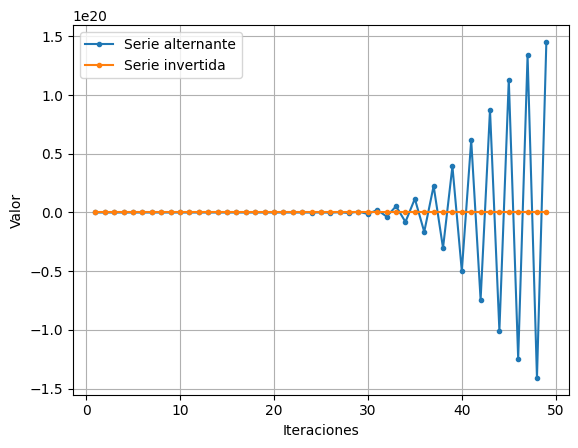

In [ ]:
N = np.arange(1,50,1)
exp1_ = np.zeros(len(N))
exp2_ = np.zeros(len(N))

for i,n in enumerate(N):
  exp1_[i] = exponencial(x,n)
  exp2_[i] = serie_invertida(x,n)


plt.plot(N,exp1_,'.-', label='Serie alternante')
plt.plot(N,exp2_,'.-', label='Serie invertida')
plt.legend()
plt.xlabel('Iteraciones')
plt.ylabel('Valor')
plt.grid()
plt.show()


[1.71828183e+02 1.34195810e+04 3.26365648e+05 5.33672150e+06
 6.54518678e+07 6.42434025e+08 5.25661508e+09 3.68794500e+10
 2.26470957e+11 1.23658686e+12 6.07870221e+12 2.71726117e+13
 1.11374530e+14 4.21499091e+14 1.48162098e+15 4.86211260e+15
 1.49620549e+16 4.33443200e+16 1.18617832e+17 3.07598358e+17
 7.57942118e+17 1.77905902e+18 3.98685265e+18 8.54773793e+18
 1.75659925e+19 3.46614683e+19 6.57759562e+19 1.20219274e+20
 2.11915066e+20 3.60730349e+20 5.93678676e+20 9.45690718e+20
 1.45957396e+21 2.18476646e+21 3.17455769e+21 4.48161967e+21
 6.15195999e+21 8.21774225e+21 1.06897607e+22 1.35506277e+22
 1.67498578e+22 2.02019538e+22 2.37882981e+22 2.73631576e+22
 3.07634966e+22 3.38216747e+22 3.63795985e+22 3.83026070e+22
 3.94913570e+22]


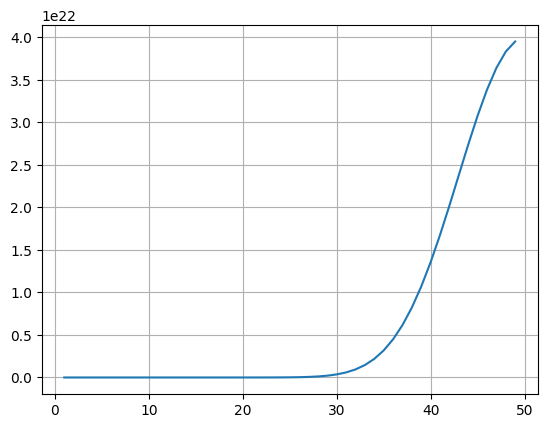

In [ ]:
x = 10
exacto = np.exp(-1)
error = abs(exp1_ - exacto)/exacto*100
print(error)
plt.plot(N, error)
plt.grid()

## 2. Cancelación sustractiva



**serieSn**. Un ejemplo de la cancelacion substractiva es en la suma de series alternantes. Considere la serie $\mathrm{S}_N$,  escrita  matematicamente de tres formas diferentes:

-
\begin{equation}
\mathrm{S}_N^{(1)} = \sum_{n = 1}^{2N} (-1)^n \frac{n}{n+1}
\end{equation}

- Sumando números pares e impares.

\begin{equation}
\mathrm{S}_N^{(2)} = -\sum_{n = 1}^{N}\frac{2n-1}{2n} + \sum_{n=1}^{N} \frac{2n}{2n+1}
\end{equation}

- Combinando las series de una forma analítica

\begin{equation}
\mathrm{S}_N^{(3)} = \sum_{n = 1}^{N}\frac{1}{2n(2n+1)}
\end{equation}



Las tres sumas $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$ son matemáticamente iguales, pero los resultados  pueden tener resultados numéricos diferentes.


- Escribir un programa que realice el cálculo de $\mathrm{S}_N^{(1)}$, $\mathrm{S}_N^{(2)}$ y $\mathrm{S}_N^{(3)}$
- Estudiar la convergencia de la serie para los tres casos.
- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.
- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)




In [ ]:
import numpy as np
import matplotlib.pylab as plt

In [ ]:
# Calcula la primera sumatoria S_(1)
N = 1E6
def cancel_sust_1(N):
  sum = 0
  for i in range(1,2*(N)+1):
    sum += ((-1)**i)*(i/(i+1))

  return sum

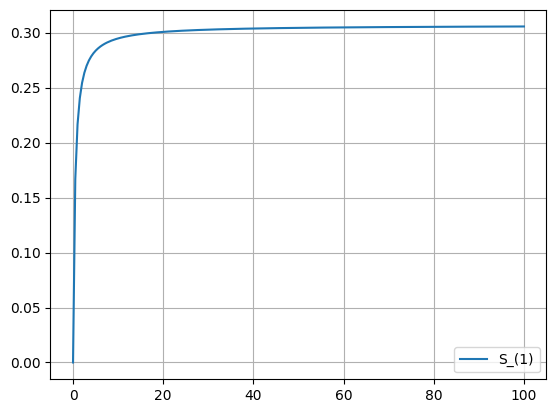

In [ ]:
datos_S_1 = []

for i in range(0,200):
  d_1 = cancel_sust_1(i)
  datos_S_1.append(d_1)

x = np.linspace(0,100,len(datos_S_1))

plt.plot(x,datos_S_1, label="S_(1)")
plt.grid()
plt.legend()
# Se observa una convergencia hacia 0.3

In [ ]:
# Calcula la 2da sumatoria S_(2)

def cancel_sust_2(N):
  sum_1 = 0
  sum_2 = 0

  for n in range(1,N+1):
    sum_1 += ((2*n)-1)/(2*n)
    sum_2 += (2*n)/(2*n+1)

  sum_T = -sum_1 + sum_2
  return sum_T

In [ ]:
cancel_sust_2(3)

0.2404761904761905

[0, 0.16666666666666663, 0.21666666666666679, 0.2404761904761905, 0.25436507936507935, 0.2634559884559886, 0.269866244866245, 0.27462814962814974, 0.27830462021638525, 0.28122859682457246, 0.2836095492055257, 0.28558583379050617, 0.2872525004571731, 0.2886770018816751, 0.2899085289752712, 0.2909837977924745, 0.29193076748944335, 0.29277110362389713, 0.29352185437464584, 0.29419661820730525, 0.29480637430486567, 0.29536008416090453, 0.29586513466595576, 0.2963276693560566, 0.2967528394240837, 0.29714499628682844, 0.2975078409892973, 0.2978445413259969, 0.29815782453401596, 0.29845005130198743, 0.29872327534570076, 0.298979291730749, 0.29921967634613367, 0.2994458183633206, 0.29965894709307506, 0.29986015433653535, 0.30005041308843516, 0.30023059326861556, 0.3004014750184467, 0.30056375999085816, 0.3007180809785126, 0.3008650101586525, 0.30100506618105527, 0.3011387202842357, 0.3012664015916897, 0.30138850171379516, 0.3015053787591455, 0.30161736084200896, 0.3017247491581614, 0.301827820

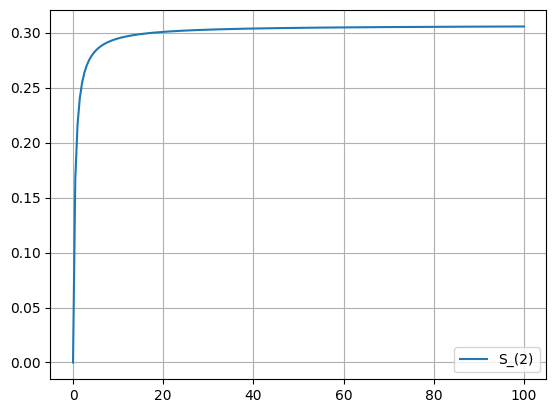

In [ ]:
datos_S_2 = []
for i in range(0,200):
  d = cancel_sust_2(i)
  datos_S_2.append(d)

x = np.linspace(0,100,len(datos_S_2))

plt.plot(x,datos_S_2, label="S_(2)")
plt.grid()
plt.legend()
print(datos_S_2)

# Comportamiento similar a S_1, converge hacía 0.30

In [ ]:
# Calcula la 3ra sumatoria S_(3)

def cancel_sust_3(N):
  suma = 0
  for n in range(1,N+1):
    suma += 1/((2*n)*((2*n) +1))

  return suma

[0, 0.16666666666666666, 0.21666666666666667, 0.24047619047619048, 0.25436507936507935, 0.26345598845598844, 0.26986624486624483, 0.2746281496281496, 0.27830462021638486, 0.281228596824572, 0.2836095492055244, 0.2855858337905046, 0.28725250045717127, 0.28867700188167267, 0.28990852897526875, 0.2909837977924731, 0.2919307674894428, 0.2927711036238966, 0.29352185437464734, 0.2941966182073059, 0.2948063743048669, 0.2953600841609023, 0.2958651346659528, 0.2963276693560546, 0.2967528394240818, 0.2971449962868269, 0.2975078409892942, 0.2978445413259946, 0.2981578245340146, 0.2984500513019866, 0.2987232753457024, 0.29897929173075105, 0.29921967634613567, 0.29944581836332246, 0.2996589470930752, 0.299860154336536, 0.3000504130884386, 0.3002305932686188, 0.3004014750184479, 0.30056375999085944, 0.30071808097851377, 0.30086501015864897, 0.30100506618105793, 0.3011387202842389, 0.3012664015916955, 0.3013885017137956, 0.3015053787591439, 0.30161736084201063, 0.30172474915816183, 0.3018278206898048

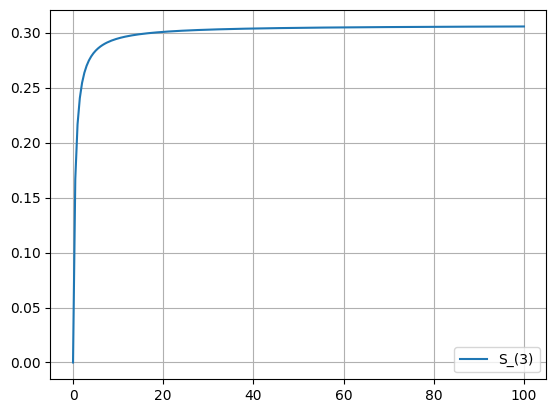

In [ ]:
datos_S_3 = []
for i in range(0,200):
  d = cancel_sust_3(i)
  datos_S_3.append(d)

x = np.linspace(0,100,len(datos_S_3))

plt.plot(x,datos_S_3, label="S_(3)")
plt.grid()
plt.legend()
print(datos_S_3)

# Comportamiento similar a S_2 y S_1, convergen hacía 0.30

Se puede evidenciar en cada una de las gráficas y de los valores de las series $S_N^{(1)}$, $S_N^{(2)}$ y $S_N^{(3)}$, que cada serie converge a valores muy cercanos a 0.30 después de casi 20 iteraciones.

- Considere  que $S_N^{(3)}$ es la solución exacta, realizar dos graficos log-log, del error relativo en función
del número de términos ($\mathrm{Log_{10}} E$ VS $\mathrm{Log_{10}} N$), para $S_N^{(1)}$ y $S_N^{(2)}$. Donde,  $E = |(S_N^{(i)} - S_N^{(3)})/S_N^{(3)}|$, i = 1, 2. Considere valores de $N = 1\times 10^{6}$.

3.0826204867899853e-13


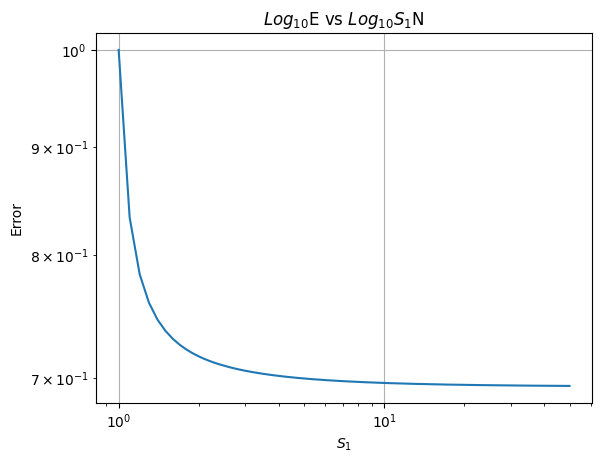

In [ ]:
N = int(1e6)

exacto = cancel_sust_3(N)
S_1 = cancel_sust_1(N)
Error_1 = abs((S_1-exacto)/exacto)
print(Error_1)

x = np.arange(1,50,0.1)
S_01 = np.zeros(len(x))

for i in range(0,len(x)):
  S_01[i] = cancel_sust_1(i)

error = np.zeros(len(x))
for i in range(0,len(error)):
  error[i] = abs(S_01[i]- Error_1/(Error_1))


plt.figure()
plt.loglog()
plt.plot(x,error)
plt.xlabel("$S_{1}$")
plt.ylabel("Error")
plt.title('$Log_{10}$E vs $Log_{10}$$S_{1}$N')
plt.grid()
plt.show()

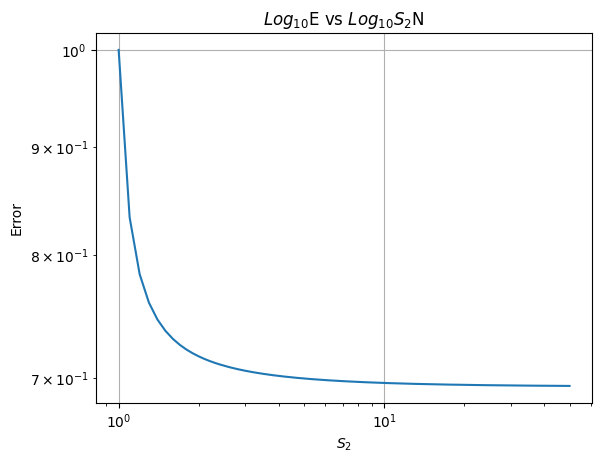

In [ ]:
N = int(1e6)

exacto = cancel_sust_3(N)
S_2 = cancel_sust_2(N)
Error_2 = abs((S_2-exacto)/exacto)


x = np.arange(1,50,0.1)
S_02 = np.zeros(len(x))

for i in range(0,len(x)):
  S_02[i] = cancel_sust_2(i)

error_2 = np.zeros(len(x))
for i in range(0,len(error_2)):
  error_2[i] = abs(S_02[i]- Error_2/(Error_2))


plt.figure()
plt.loglog()
plt.plot(x,error_2)
plt.xlabel("$S_{2}$")
plt.ylabel("Error")
plt.title('$Log_{10}$E vs $Log_{10}$$S_{2}$N')
plt.grid()
plt.show()

- Analizar y discutir los resultados. Tenga en cuenta la discusión realizada sobre teoría de errores en la página
39 del libro del libro [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0)

Según las preguntas de la página 39 del libro  [Computational Physics. ](https://www.dropbox.com/s/n06ul2r4l65khl6/Computational%20Physics%20-%20Problem%20Solving%20with%20Computers%2C%203527406263.pdf?dl=0), este analísis está bien ejecutado ya que los valores de cada una de las series converge a un valor cercaco (0.3), el algoritmo de busqueda tiene una velocidad bastante acelerada y como se puede ver en las gráficas Log-Log el error a medida que tomamos valores más grandes para las sumatorias va convergiendo hacía un mismo valor de un modo asintotico.
